## Name : Manas Chopra

### Problem 1. Train a machine learning model using the training file to predict the values of the ‘Dataset’ column for the test file. ( Evaluation on the basis on Accuracy score)

In [1556]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import matplotlib.image as mpimage
from sklearn import metrics

In [1557]:
dataset_1=pd.read_csv('train.csv')

In [1558]:
dataset_1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [1559]:
dataset_1.shape

(466, 11)

###### Checking missing values using heatmap

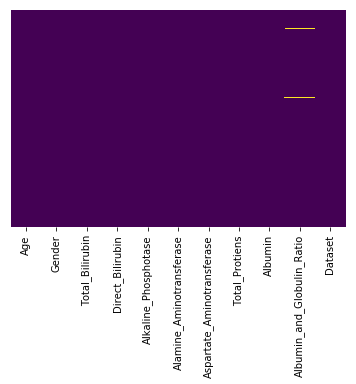

In [1560]:
sns.heatmap(dataset_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1561]:
dataset_1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

###### filling data with mean values

In [1562]:
dataset_1['Albumin_and_Globulin_Ratio']=dataset_1.fillna(dataset_1['Albumin_and_Globulin_Ratio'].mean)

In [1563]:
dataset_1.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [1564]:
dataset_1.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,45.321888,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,1.285408
std,15.697936,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.452094
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,1.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,1.000000
50%,46.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,1.000000
75%,58.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,2.000000
max,85.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.000000


In [1565]:
dataset_1.groupby('Gender').describe()

Age                                                     \
        count       mean        std  min   25%   50%   75%   max   
Gender                                                             
Female  105.0  44.457143  14.937709  8.0  34.0  45.0  54.0  85.0   
Male    361.0  45.573407  15.923454  4.0  33.0  46.0  60.0  78.0   

       Alamine_Aminotransferase            ...  Total_Bilirubin        \
                          count       mean ...              75%   max   
Gender                                     ...                          
Female                    105.0  50.323810 ...              1.0  27.7   
Male                      361.0  92.030471 ...              3.1  75.0   

       Total_Protiens                                               
                count      mean       std  min  25%  50%  75%  max  
Gender                                                              
Female          105.0  6.776190  1.106234  3.6  6.1  6.9  7.6  8.9  
Male            361.0  6.409141  1.081151  2.7  5.7  6.4  7.1  9.6  

[2 rows x 72 columns]

In [1566]:
X=dataset_1.iloc[:,:10]
y=dataset_1.iloc[:,10]

In [1567]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [1568]:
dataset_1.corr()
#Corr b/w Aspartate_Aminotransferase & Alamine_Aminotransferase = 0.784521
#Corr b/w Albumin & Total_Protiens = 0.773420
#Corr b/w Direct_Bilirubin & Total_Bilirubin = 0.866070

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Dataset
Age,1.000000,0.017007,0.004349,0.112266,-0.066935,0.005839,-0.202705,-0.281515,-0.136606
Total_Bilirubin,0.017007,1.000000,0.866070,0.153458,0.202096,0.227747,0.006593,-0.211662,-0.216970
Direct_Bilirubin,0.004349,0.866070,1.000000,0.186806,0.235821,0.260630,0.023680,-0.213277,-0.243594
Alkaline_Phosphotase,0.112266,0.153458,0.186806,1.000000,0.100744,0.151079,-0.023904,-0.165888,-0.187186
Alamine_Aminotransferase,-0.066935,0.202096,0.235821,0.100744,1.000000,0.784251,-0.033468,-0.010968,-0.156944
Aspartate_Aminotransferase,0.005839,0.227747,0.260630,0.151079,0.784251,1.000000,-0.016300,-0.075667,-0.148021
Total_Protiens,-0.202705,0.006593,0.023680,-0.023904,-0.033468,-0.016300,1.000000,0.773420,0.048957
Albumin,-0.281515,-0.211662,-0.213277,-0.165888,-0.010968,-0.075667,0.773420,1.000000,0.182147
Dataset,-0.136606,-0.216970,-0.243594,-0.187186,-0.156944,-0.148021,0.048957,0.182147,1.000000


#### Encoding Categorical data

In [1569]:
Gender = pd.get_dummies(X['Gender'], prefix = 'Gender', drop_first=True)

In [1570]:
X.drop('Gender',axis=1,inplace=True)

In [1571]:
X=pd.concat([X,Gender],axis=1)

In [1572]:
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,60,6.3,3.2,314,118,114,6.6,3.7,60,1
1,31,0.8,0.2,158,21,16,6.0,3.0,31,0
2,60,19.6,9.5,466,46,52,6.1,2.0,60,1
3,34,8.7,4.0,298,58,138,5.8,2.4,34,1
4,26,0.9,0.2,154,16,12,7.0,3.5,26,0


In [1573]:
#X.drop(['Aspartate_Aminotransferase'],axis=1,inplace=True)

In [1574]:
#x=X.copy()
#x.drop(['Direct_Bilirubin','Aspartate_Aminotransferase'],axis=1,inplace=True)
X.drop(['Direct_Bilirubin','Aspartate_Aminotransferase'],axis=1,inplace=True)dd

###### Handling Outliers

In [1575]:
#plt.figure(figsize=(20, 6))
#sns.boxplot(data= X).set_title("Outlier Box Plot")


In [1576]:
#list(X.columns)

In [1577]:
#for i in list(X.columns):
#    X[i] = X[i][X[i].between(X[i].quantile(.025), X[i].quantile(.975))]

In [1578]:
#X.isnull().sum()

In [1579]:
#for i in list(X.columns):
#    X[i].fillna(X[i].mean(),inplace=True)

In [1580]:
#X.head()

###### Splitting into train and test sets

In [1581]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,60.0,6.300000,3.2,314.0,118.000000,114.000000,6.6,3.7,60.0,1
1,31.0,0.800000,0.2,158.0,21.000000,16.000000,6.0,3.0,31.0,0
2,60.0,1.519259,9.5,466.0,46.000000,52.000000,6.1,2.0,60.0,1
3,34.0,1.519259,4.0,298.0,58.000000,138.000000,5.8,2.4,34.0,1
4,26.0,0.900000,0.2,154.0,41.540761,79.851351,7.0,3.5,26.0,0


In [1349]:
X.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Gender_Male                   0
dtype: int64

In [1582]:
#x.columns

In [1583]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Gender_Male'],
      dtype='object')

###### SCALING

In [1584]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :] = sc.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = sc.transform(X_test.iloc[:,:])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [1585]:
X_train.head()

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
283,-0.725511,0.036591,0.677368,0.098041,-0.026222,-0.461165,-0.725511,0.527625
343,-0.534941,-0.323136,-0.410374,-0.239156,-1.158379,-1.330475,-0.534941,0.527625
242,0.227336,0.066568,-0.432498,-0.129794,0.351163,-0.212791,0.227336,0.527625
128,-0.344372,0.066568,0.161151,3.902896,0.162470,0.780707,-0.344372,0.527625
419,1.497800,-0.383090,-0.336629,-0.280166,0.351163,-0.212791,1.497800,0.527625


In [1586]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1587]:
y_pred=classifier.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.7606837606837606

###### Checking Accuracy using k-fold cross validation method

In [1588]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_test, y=y_test, cv=27)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()


In [1589]:
model_accuracy

0.7592592592592593

In [1590]:
model_standard_deviation

0.078217452155344

###### KNN

In [1591]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(50)
model_knn.fit(X_train,y_train)
metrics.accuracy_score(model_knn.predict(X_test),y_test)

0.7863247863247863

###### SVC

In [1592]:
from sklearn.svm import SVC
classifier=SVC(random_state=1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
metrics.accuracy_score(classifier.predict(X_test),y_test)

0.7863247863247863

###### Decision Tree

In [1593]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
metrics.accuracy_score(clf.predict(X_test),y_test)

0.717948717948718

###### Naive Bayes

In [1594]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Output 
metrics.accuracy_score(model.predict(X_test),y_test)

0.49572649572649574

### After Trying 5 different Machine Learning algorithms,
### KNN is giving the maximum accuracy of 78.6 %

## Predicting 'Dataset' column for Test data

In [1607]:
test_data=pd.read_csv("test.csv")

In [1608]:
test_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


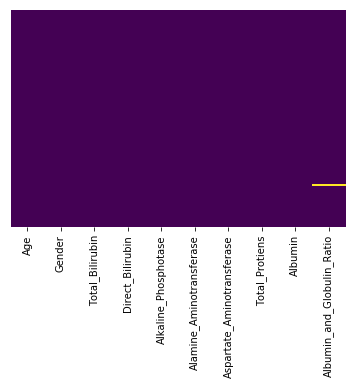

In [1609]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [1610]:
test_data['Albumin_and_Globulin_Ratio']=test_data.fillna(dataset_1['Albumin_and_Globulin_Ratio'].mean)

In [1611]:
test_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [1612]:
Gender_test = pd.get_dummies(test_data['Gender'], prefix = 'Gender', drop_first=True)
test_data.drop('Gender',axis=1,inplace=True)
test_data=pd.concat([test_data,Gender_test],axis=1)

In [1613]:
test_data.shape

(117, 10)

In [1614]:
test_data.drop(['Direct_Bilirubin','Aspartate_Aminotransferase'],axis=1,inplace=True)

In [1615]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_data.iloc[:, :] = sc.fit_transform(test_data.iloc[:,:])

In [1616]:
# KNN

In [1639]:
from sklearn.neighbors import KNeighborsClassifier

solution_1=model_knn.predict(test_data)


In [1640]:
solution_1.shape

(117,)

In [1641]:
solution_1=pd.DataFrame(solution_1,columns=['Dataset'])

In [1642]:
test_data1=pd.read_csv("test.csv")

In [1643]:
solution_1=pd.concat([test_data1,solution_1],axis=1)

In [1644]:
solution_1.to_csv('Predicted_test_data.csv',index=False)

In [1645]:
solution_1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10,1
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50,1
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40,1
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34,1
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00,1
5,66,Female,0.7,0.2,162,24,20,6.4,3.2,1.00,1
6,45,Female,3.5,1.5,189,63,87,5.6,2.9,1.00,1
7,38,Male,1.8,0.8,342,168,441,7.6,4.4,1.30,1
8,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
9,55,Male,1.8,9.0,272,22,79,6.1,2.7,0.70,1
